# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Users data

In [103]:
# Read the users data
user_info = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")

In [104]:
user_info.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [95]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [96]:
user_info.shape

(12000, 10)

# Engagement data

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period

In [17]:
engagement = pd.read_csv('takehome_user_engagement.csv')

In [18]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [19]:
engagement.shape

(207917, 3)

In [20]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [30]:
engagement['timestamp'] = engagement['time_stamp'].apply(lambda x: pd.Timestamp(x))

In [49]:
engagement['week'] = engagement['timestamp'].apply(lambda x: pd.Period(x, 'W'))

In [59]:
sorted_weekly = engagement.groupby(['week', 'user_id']).sum().sort_values('visited', ascending=False)

In [63]:
adopted_users = sorted_weekly[sorted_weekly['visited']>3]

In [64]:
adopted_users.shape

(24444, 1)

In [122]:
pairs = adopted_users.index
users=[]
# Iterate over pairs
for idx, pair in enumerate(pairs):
    period, user_id = pair
    users.append(user_id)

In [123]:
len(users)

24444

There are 24,444 users who visited at least 3 times per week. I will use this list of user_ids to label the user_info data with 

# Label Adopted Users

In [124]:
# Create a target binary variable that is 1 for adopted users and 0 for not adopted users
user_info['adopted']=0
user_info['adopted'] = user_info.object_id.isin(users).astype(int)
user_info['adopted'].value_counts()

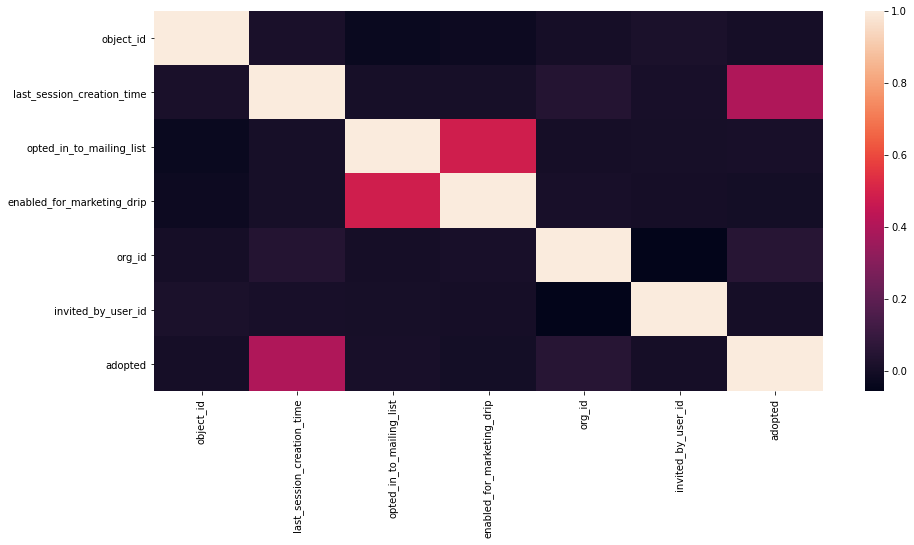

In [129]:
# Plot to see correlation between predictors and the target ('adopted')
_ = plt.figure(figsize=(15,7))
_ = sns.heatmap(user_info.corr())
plt.show()

There appears to be some correlation between 'adopted' and 'last_session_creation_time' but surprisingly no correlation appears between 'adopted' and other variables. So I will explore those variables in more detail to understanding what is going on.

# Feature engineering

In [132]:
# Let's take look at counts for each class
user_info['enabled_for_marketing_drip'].value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [133]:
# Let's take a look at counts for each class
user_info['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [143]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted                     12000 non-null  int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 984.5+ KB


In [139]:
user_info['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [142]:
# There are missing values in 'last_session_creation_time' so fill them with its mean
user_info['last_session_creation_time'].fillna(user_info['last_session_creation_time'].mean(), inplace=True)

In [144]:
X = user_info[['last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]
y = user_info['adopted']

In [145]:
# Try a quick Lasso to find out the most important features
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

In [146]:
X_names = ['last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']

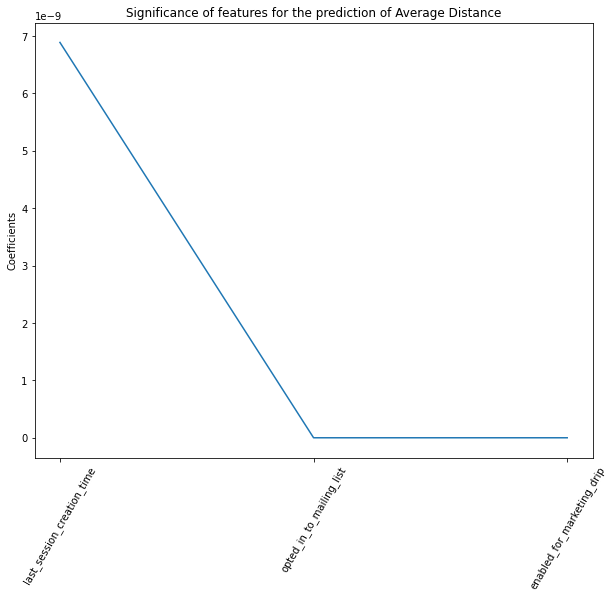

In [147]:
# Plot the importance of features
_ = plt.figure(figsize=(10,8))
_ = plt.plot(range(len(X_names)), lasso_coef)
_ = plt.xticks(range(len(X_names)), X_names, rotation=60)
_ = plt.ylabel('Coefficients')
_ = plt.title('Significance of features for the prediction of Average Distance')
plt.show()

According to Lasso, the only important feature is 'last_session_creation_time' as depicted by the correlation heatmap. Let's quickly train a vanilla Logit model with the predictor 'last_session_creation_time' and look at some metrics.

# Modeling  - Vanilla Logit Model

In [152]:
X = user_info['last_session_creation_time'].values.reshape(-1, 1)
y = user_info['adopted']

In [153]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8400, 1), (3600, 1), (8400,), (3600,))

In [155]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # Instantiate the Logistic Regression
lr.fit(X_train, y_train) # Fit/train the model on training set
y_pred = lr.predict(X_test) # Make prediction on the test set

In [156]:
sum(y_pred==y_test)/len(y_test)

0.9027777777777778

In [157]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3250
           1       0.00      0.00      0.00       350

    accuracy                           0.90      3600
   macro avg       0.45      0.50      0.47      3600
weighted avg       0.82      0.90      0.86      3600



C:\Users\Bauyrjan.Jyenis\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
print(confusion_matrix(y_test, y_pred))

[[3250    0]
 [ 350    0]]


# Summary of Findings

As seen from above, the only important factor that could possibly be a predictor to predict the target variable is 'last_session_creation_time' according to both correlation matrix and Lasso. With 'last_session_creation_time' as the only predictor variable, the accuracy came out pretty good, 90%, in predicting the target variable. However, the confusion matrix doesn't make sense. I suspect I need to create better features to make more robust model. We can do one-hot encoding on the feature 'creation_source' to create multi class variable to be used as predictors. I haven't tested that in this study but definitely something I'd test. As next step, I'd research other relevant data sources and features that could be included to build better models.